Applying KMeans Clustering on 40 Indian Stocks

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

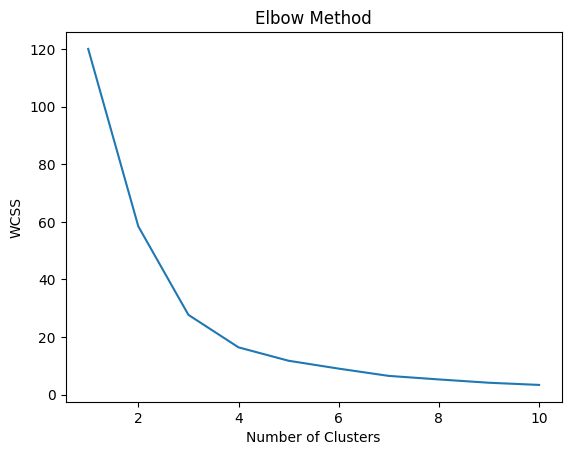

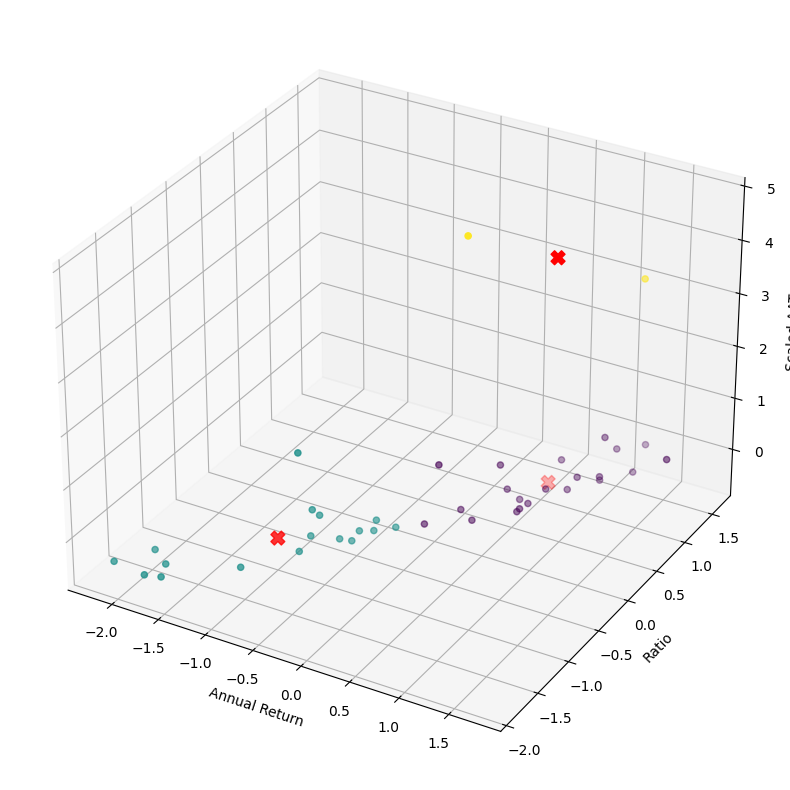

Scaled Cluster Centroids:
   annual_return     ratio       AAT  cluster
0       0.735854  0.731296 -0.150128        0
1      -0.991686 -1.006629 -0.280601        1
2       0.702867  0.877741  3.961453        2
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%****

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yfinance import download
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Define the list of tickers for 40 Indian Companies and 40 Indian Companies
tickers = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS', 'HINDUNILVR.NS', 'ICICIBANK.NS', 'INFY.NS', 'KOTAKBANK.NS', 'ITC.NS',
           'BANKBARODA.NS', 'SBIN.NS', 'ASIANPAINT.NS', 'LT.NS', 'HCLTECH.NS', 'MARUTI.NS', 'AXISBANK.NS', 'WIPRO.NS',
           'POWERGRID.NS', 'NESTLEIND.NS', 'NTPC.NS', 'HEROMOTOCO.NS', 'ONGC.NS', 'SUNPHARMA.NS', 'BAJAJFINSV.NS',
           'HDFCLIFE.NS', 'BRITANNIA.NS', 'M&M.NS', 'ULTRACEMCO.NS', 'BAJFINANCE.NS', 'TITAN.NS', 'CIPLA.NS', 'GRASIM.NS',
           'SHREECEM.NS', 'COALINDIA.NS', 'ADANIPORTS.NS', 'IOC.NS', 'DRREDDY.NS', 'TATAMOTORS.NS', 'EICHERMOT.NS',
           'JSWSTEEL.NS', 'TECHM.NS' ]  # Your list of tickers here

# Initialize empty lists to store data
annual_returns = []
ratios = []
AATs = []

# Retrieve historical stock data from Yahoo Finance API
for ticker in tickers:

        df1 = download(ticker, start="2018-01-01", end="2020-12-31")
        Z1 = np.array(df1['Close'])

        # Calculate logarithmic returns
        daily_returns = np.diff(np.log(Z1))

        annual_return = np.mean(daily_returns)*252
        return_std = np.std(daily_returns)
        ratio = annual_return/return_std
        AAT = 0.25*(2*np.mean(Z1) + Z1[-1])

        # Store calculated data in lists
        annual_returns.append(annual_return)
        AATs.append(AAT)
        ratios.append(ratio)

# Create DataFrame from the collected data
data = {'annual_return': annual_returns, 'ratio': ratios, 'AAT': AATs}
X = pd.DataFrame(data)

#mx = MinMaxScaler()
ss = StandardScaler()
X['AAT'] = ss.fit_transform(X[['AAT']])
X['annual_return'] = ss.fit_transform(X[['annual_return']])
X['ratio'] = ss.fit_transform(X[['ratio']])


X

# Handle missing data (NaN values) in the dataframe
X.dropna(inplace=True)  # Drop rows with NaN values

# Find the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10)  # Update n_init parameter
    kmeans.fit(X[['annual_return', 'ratio', 'AAT']])
    wcss.append(kmeans.inertia_)

# ... (Rest of the code)


# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


# Based on the elbow curve, choose the optimal number of clusters
optimal_num_clusters = 3

# Apply K-Means clustering algorithm to cluster the stocks
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=0, n_init=10).fit(X[['annual_return', 'ratio', 'AAT']])  # Update n_init parameter
labels = kmeans.labels_

# Add scaled cluster labels to the DataFrame
X['cluster'] = labels

# Calculate centroids of the scaled clusters
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['annual_return', 'ratio', 'AAT'])
centroids['cluster'] = range(optimal_num_clusters)  # Add cluster labels

# Visualize the scaled clusters
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['annual_return'], X['ratio'], X['AAT'], c=labels, cmap='viridis')
ax.scatter(centroids['annual_return'], centroids['ratio'], centroids['AAT'],
           marker='X', c='red', s=100)
ax.set_xlabel('Annual Return')
ax.set_ylabel('Ratio')
ax.set_zlabel('Scaled AAT')
plt.show()


# Display scaled cluster centroids with calculated values
print("Scaled Cluster Centroids:")
print(centroids)


num_companies = []
# Iterate through each scaled cluster
for scaled_cluster_id in range(optimal_num_clusters):
    scaled_cluster_indices = X[X['cluster'] == scaled_cluster_id].index
    num_companies = len(scaled_cluster_indices)

    # Create a return matrix for the cluster
    return_matrix = np.zeros((504, num_companies))

    # Populate the return matrix using out-of-sample data (2021-2022)
    for i, idx in enumerate(scaled_cluster_indices):  # Use scaled_cluster_indices here
        ticker = tickers[idx]
        try:
            df_out_of_sample = download(ticker, start="2021-01-01", end="2022-12-31")
            close_prices = df_out_of_sample['Close'].values
            returns = np.diff(np.log(close_prices))
            return_matrix[:len(returns), i] = returns
        except Exception as e:
            print(f"Failed to download out-of-sample data for {ticker}")

    # Create a matrix X with elements 1/n
    X_matrix = np.full((num_companies, 1), 1 / num_companies)

    # Multiply return matrix B by matrix X
    portfolio_returns = np.dot(return_matrix, X_matrix)


    # Calculate Mean, Standard Deviation, and Sharpe Ratio
    mean_portfolio_return = np.mean(portfolio_returns)
    std_portfolio_return = np.std(portfolio_returns)
    sharpe_ratio = mean_portfolio_return / std_portfolio_return


    print(f"Scaled Cluster {scaled_cluster_id + 1} - Portfolio Statistics:")
    print("Mean Portfolio Return:", mean_portfolio_return)
    print("Standard Deviation of Portfolio Return:", std_portfolio_return)
    print("Sharpe Ratio:", sharpe_ratio)
    print("===")



  # Create matrix Z with 40 rows and 1 column
Z_matrix = np.full((len(tickers), 1), 1 / len(tickers))
# Create matrix C with 504 rows and 40 columns
return_matrix_c = np.zeros((504, len(tickers)))

# Populate matrix C with the historical return data
for i, ticker in enumerate(tickers):
    try:
        df_out_of_sample = download(ticker, start="2021-01-01", end="2022-12-31")
        close_prices = df_out_of_sample['Close'].values
        returns = np.diff(np.log(close_prices))
        return_matrix_c[:len(returns), i] = returns
    except Exception as e:
        print(f"Failed to download out-of-sample data for {ticker}")


# Calculate mean returns for each company across the return matrix
mean_returns_per_company = np.mean(return_matrix_c, axis=0)

# Print the mean returns for each company
for i, ticker in enumerate(tickers):
    print(f"Mean return for {ticker}: {mean_returns_per_company[i]}")

# Multiply matrix C by matrix Z
portfolio_returns_y_prime = np.dot(return_matrix_c, Z_matrix)

# Calculate Mean, Standard Deviation, and Sharpe Ratio for portfolio returns Y'
mean_portfolio_return_y_prime = np.mean(portfolio_returns_y_prime)
std_portfolio_return_y_prime = np.std(portfolio_returns_y_prime)
sharpe_ratio_y_prime = mean_portfolio_return_y_prime / std_portfolio_return_y_prime

# Print the statistics for portfolio returns Y'

print("Portfolio Returns Y' Statistics:")

#print("Portfolio Returns Matrix formed by multiplying return matrix by the matrix where Naive Strategy is applied: ", portfolio_returns_y_prime )
print("Mean Portfolio Return:", mean_portfolio_return_y_prime)
print("Standard Deviation of Portfolio Return:", std_portfolio_return_y_prime)
print("Sharpe Ratio:", sharpe_ratio_y_prime)



# Find the cluster that meets the specified criteria
best_cluster = None
best_cluster_metrics = None

for cluster_id in range(optimal_num_clusters):
    cluster_indices = np.where(labels == cluster_id)[0]

    cluster_mean = np.mean(portfolio_returns[cluster_indices])
    cluster_std = np.std(portfolio_returns[cluster_indices])
    cluster_sharpe_ratio = cluster_mean / cluster_std

    # Criteria 1: Standard Deviation is lower and Sharpe Ratio is higher
    if cluster_std < std_portfolio_return_y_prime and cluster_sharpe_ratio > sharpe_ratio_y_prime:
        if best_cluster is None or cluster_sharpe_ratio > best_cluster_metrics[2]:
            best_cluster = cluster_id
            best_cluster_metrics = (cluster_mean, cluster_std, cluster_sharpe_ratio)

    # Criteria 2: Mean Value is higher
    elif cluster_mean > mean_portfolio_return_y_prime and (best_cluster is None or cluster_mean > best_cluster_metrics[0]):
        best_cluster = cluster_id
        best_cluster_metrics = (cluster_mean, cluster_std, cluster_sharpe_ratio)

if best_cluster is None:
    print("No cluster meets the specified criteria.")
else:
    print("Best Cluster:")
    print("Cluster ID:", best_cluster)
    print("Mean:", best_cluster_metrics[0])
    print("Standard Deviation:", best_cluster_metrics[1])
    print("Sharpe Ratio:", best_cluster_metrics[2])

# List of tickers for companies in the best cluster
best_cluster_indices = np.where(labels == best_cluster)[0]
best_cluster_tickers = [tickers[i] for i in best_cluster_indices]

print("Companies in the Best Cluster (Cluster ID {}):".format(best_cluster))
for ticker in best_cluster_tickers:
    print(ticker)


Applying KMeans Clustering on 40 US Stocks

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

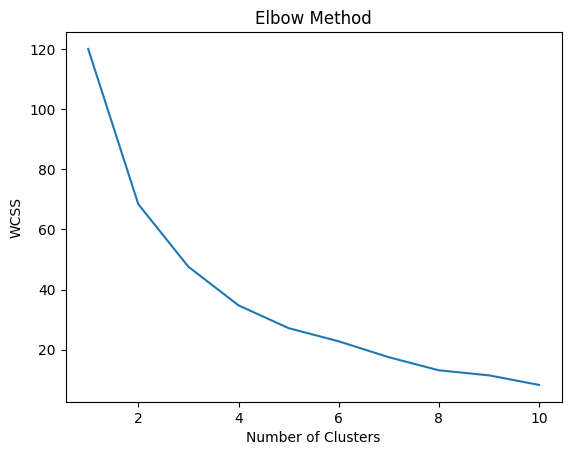

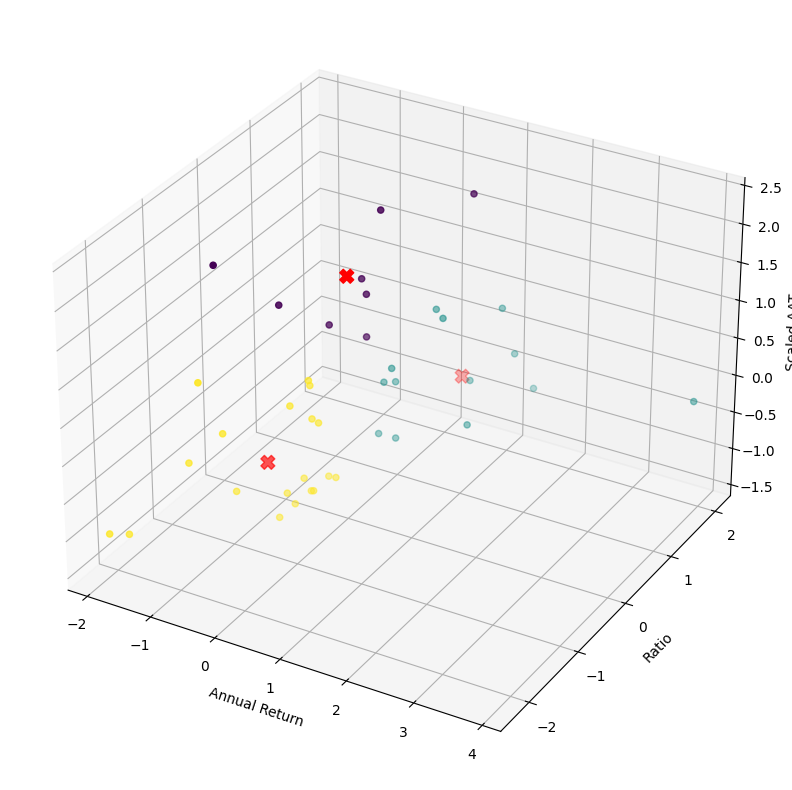

Scaled Cluster Centroids:
   annual_return     ratio       AAT  cluster
0      -0.030995  0.046502  1.566487        0
1       0.971125  1.068219 -0.089028        1
2      -0.651404 -0.750466 -0.598659        2
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Scaled Cluster 1 - Portfolio Statistics:
Mean Portfolio Return: 5.81392744393095e-05
Standard Deviation of Portfolio Return: 0.01309061736788195
Sharpe Ratio: 0.004441293546777648
===
[*********************100%%**********************]  1 

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yfinance import download
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Define the list of tickers for 40 Indian Companies and 40 Indian Companies
tickers = ['AAPL', 'GOOGL', 'AMZN', 'META', 'TSLA', 'MSFT', 'NVDA', 'JPM', 'JNJ', 'V',
           'PG', 'UNH', 'MA', 'HD', 'DIS', 'BAC', 'VZ', 'KO', 'PFE', 'MRK', 'WMT', 'XOM',
           'CVX', 'CSCO', 'BA', 'MMM', 'IBM', 'INTC', 'GS', 'CAT', 'MCD', 'NKE', 'AXP',
           'WBA', 'TRV', 'HON', 'DOW', 'CRM', 'C', 'MS' ]  # Your list of tickers here

# Initialize empty lists to store data
annual_returns = []
ratios = []
AATs = []

# Retrieve historical stock data from Yahoo Finance API
for ticker in tickers:

        df1 = download(ticker, start="2018-01-01", end="2020-12-31")
        Z1 = np.array(df1['Close'])

        # Calculate logarithmic returns
        daily_returns = np.diff(np.log(Z1))

        annual_return = np.mean(daily_returns)*252
        return_std = np.std(daily_returns)
        ratio = annual_return/return_std
        AAT = 0.25*(2*np.mean(Z1) + Z1[-1])

        # Store calculated data in lists
        annual_returns.append(annual_return)
        AATs.append(AAT)
        ratios.append(ratio)

# Create DataFrame from the collected data
data = {'annual_return': annual_returns, 'ratio': ratios, 'AAT': AATs}
X = pd.DataFrame(data)

#mx = MinMaxScaler()
ss = StandardScaler()
X['AAT'] = ss.fit_transform(X[['AAT']])
X['annual_return'] = ss.fit_transform(X[['annual_return']])
X['ratio'] = ss.fit_transform(X[['ratio']])


X

# Handle missing data (NaN values) in the dataframe
X.dropna(inplace=True)  # Drop rows with NaN values

# Find the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10)  # Update n_init parameter
    kmeans.fit(X[['annual_return', 'ratio', 'AAT']])
    wcss.append(kmeans.inertia_)

# ... (Rest of the code)


# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


# Based on the elbow curve, choose the optimal number of clusters
optimal_num_clusters = 3

# Apply K-Means clustering algorithm to cluster the stocks
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=0, n_init=10).fit(X[['annual_return', 'ratio', 'AAT']])  # Update n_init parameter
labels = kmeans.labels_

# Add scaled cluster labels to the DataFrame
X['cluster'] = labels

# Calculate centroids of the scaled clusters
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['annual_return', 'ratio', 'AAT'])
centroids['cluster'] = range(optimal_num_clusters)  # Add cluster labels

# Visualize the scaled clusters
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['annual_return'], X['ratio'], X['AAT'], c=labels, cmap='viridis')
ax.scatter(centroids['annual_return'], centroids['ratio'], centroids['AAT'],
           marker='X', c='red', s=100)
ax.set_xlabel('Annual Return')
ax.set_ylabel('Ratio')
ax.set_zlabel('Scaled AAT')
plt.show()


# Display scaled cluster centroids with calculated values
print("Scaled Cluster Centroids:")
print(centroids)


num_companies = []
# Iterate through each scaled cluster
for scaled_cluster_id in range(optimal_num_clusters):
    scaled_cluster_indices = X[X['cluster'] == scaled_cluster_id].index
    num_companies = len(scaled_cluster_indices)

    # Create a return matrix for the cluster
    return_matrix = np.zeros((504, num_companies))

    # Populate the return matrix using out-of-sample data (2021-2022)
    for i, idx in enumerate(scaled_cluster_indices):  # Use scaled_cluster_indices here
        ticker = tickers[idx]
        try:
            df_out_of_sample = download(ticker, start="2021-01-01", end="2022-12-31")
            close_prices = df_out_of_sample['Close'].values
            returns = np.diff(np.log(close_prices))
            return_matrix[:len(returns), i] = returns
        except Exception as e:
            print(f"Failed to download out-of-sample data for {ticker}")

    # Create a matrix X with elements 1/n
    X_matrix = np.full((num_companies, 1), 1 / num_companies)

    # Multiply return matrix B by matrix X
    portfolio_returns = np.dot(return_matrix, X_matrix)


    # Calculate Mean, Standard Deviation, and Sharpe Ratio
    mean_portfolio_return = np.mean(portfolio_returns)
    std_portfolio_return = np.std(portfolio_returns)
    sharpe_ratio = mean_portfolio_return / std_portfolio_return


    print(f"Scaled Cluster {scaled_cluster_id + 1} - Portfolio Statistics:")
    print("Mean Portfolio Return:", mean_portfolio_return)
    print("Standard Deviation of Portfolio Return:", std_portfolio_return)
    print("Sharpe Ratio:", sharpe_ratio)
    print("===")



  # Create matrix Z with 40 rows and 1 column
Z_matrix = np.full((len(tickers), 1), 1 / len(tickers))
# Create matrix C with 504 rows and 40 columns
return_matrix_c = np.zeros((504, len(tickers)))

# Populate matrix C with the historical return data
for i, ticker in enumerate(tickers):
    try:
        df_out_of_sample = download(ticker, start="2021-01-01", end="2022-12-31")
        close_prices = df_out_of_sample['Close'].values
        returns = np.diff(np.log(close_prices))
        return_matrix_c[:len(returns), i] = returns
    except Exception as e:
        print(f"Failed to download out-of-sample data for {ticker}")


# Calculate mean returns for each company across the return matrix
mean_returns_per_company = np.mean(return_matrix_c, axis=0)

# Print the mean returns for each company
for i, ticker in enumerate(tickers):
    print(f"Mean return for {ticker}: {mean_returns_per_company[i]}")

# Multiply matrix C by matrix Z
portfolio_returns_y_prime = np.dot(return_matrix_c, Z_matrix)

# Calculate Mean, Standard Deviation, and Sharpe Ratio for portfolio returns Y'
mean_portfolio_return_y_prime = np.mean(portfolio_returns_y_prime)
std_portfolio_return_y_prime = np.std(portfolio_returns_y_prime)
sharpe_ratio_y_prime = mean_portfolio_return_y_prime / std_portfolio_return_y_prime

# Print the statistics for portfolio returns Y'

print("Portfolio Returns Y' Statistics:")

#print("Portfolio Returns Matrix formed by multiplying return matrix by the matrix where Naive Strategy is applied: ", portfolio_returns_y_prime )
print("Mean Portfolio Return:", mean_portfolio_return_y_prime)
print("Standard Deviation of Portfolio Return:", std_portfolio_return_y_prime)
print("Sharpe Ratio:", sharpe_ratio_y_prime)



# Find the cluster that meets the specified criteria
best_cluster = None
best_cluster_metrics = None

for cluster_id in range(optimal_num_clusters):
    cluster_indices = np.where(labels == cluster_id)[0]

    cluster_mean = np.mean(portfolio_returns[cluster_indices])
    cluster_std = np.std(portfolio_returns[cluster_indices])
    cluster_sharpe_ratio = cluster_mean / cluster_std

    # Criteria 1: Standard Deviation is lower and Sharpe Ratio is higher
    if cluster_std < std_portfolio_return_y_prime and cluster_sharpe_ratio > sharpe_ratio_y_prime:
        if best_cluster is None or cluster_sharpe_ratio > best_cluster_metrics[2]:
            best_cluster = cluster_id
            best_cluster_metrics = (cluster_mean, cluster_std, cluster_sharpe_ratio)

    # Criteria 2: Mean Value is higher
    elif cluster_mean > mean_portfolio_return_y_prime and (best_cluster is None or cluster_mean > best_cluster_metrics[0]):
        best_cluster = cluster_id
        best_cluster_metrics = (cluster_mean, cluster_std, cluster_sharpe_ratio)

if best_cluster is None:
    print("No cluster meets the specified criteria.")
else:
    print("Best Cluster:")
    print("Cluster ID:", best_cluster)
    print("Mean:", best_cluster_metrics[0])
    print("Standard Deviation:", best_cluster_metrics[1])
    print("Sharpe Ratio:", best_cluster_metrics[2])

# List of tickers for companies in the best cluster
best_cluster_indices = np.where(labels == best_cluster)[0]
best_cluster_tickers = [tickers[i] for i in best_cluster_indices]

print("Companies in the Best Cluster (Cluster ID {}):".format(best_cluster))
for ticker in best_cluster_tickers:
    print(ticker)
